## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [30]:
# Nothing to do here

In [31]:
%%nose
def test_default():
  assert True

1/1 tests passed


## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of Lego sets!</p>

In [32]:
# Import pandas
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
print(colors.head())


   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


In [33]:
%%nose

test_colors = pd.read_csv('datasets/colors.csv')
def test_colors_exists():
    assert 'colors' in globals(), "You should read the data into a variable named `colors`"
    assert colors.equals(test_colors), "Did you read in the correct csv file?"

1/1 tests passed


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [34]:
# How many distinct colors are available?
num_colors=colors.name.count()
# Print num_colors
print(num_colors)

135


In [35]:
%%nose
def test_num_colors():
    assert num_colors == 135, "The variable num_colors should equal 135"

1/1 tests passed


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [36]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [37]:
%%nose
def test_colors_summary_exists():
    assert 'colors_summary' in globals(), "You should have defined a variable named `colors_summary`"
def test_colors_summary():
    assert colors_summary.shape == (2, 3), "The DataFrame colors_summary should contain 2 rows and 3 columns"

2/2 tests passed


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


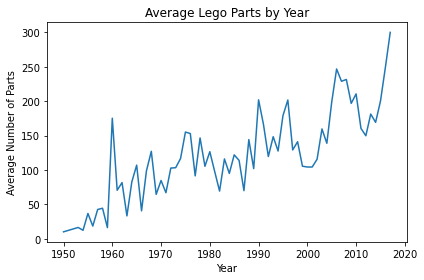

In [38]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv("datasets/sets.csv")

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 
                      'num_parts']].groupby('year', as_index=False).mean().round(2)

# Plot trends in average number of parts by year
import matplotlib.pyplot as plt
plt.plot('year', 'num_parts', data = parts_by_year)
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.title('Average Lego Parts by Year')
plt.show()


In [39]:
%%nose

test_sets = pd.read_csv('datasets/sets.csv')

def test_sets_exists():
    assert 'sets' in globals(), "You should read the data into a variable named `sets`"
    assert sets.equals(test_sets), "Did you read in the correct csv file?"
    
def test_parts_by_year_exists():
    assert 'parts_by_year' in globals(), "You should have defined a variable named `parts_by_year`"
    assert len(parts_by_year) == 66, "Did you correctly group the `sets` DataFrame by year?"

2/2 tests passed


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [40]:
# themes_by_year: Number of themes shipped by year
themes_by_year=sets.groupby("year")[["theme_id"]].nunique()
print(themes_by_year[:2])

      theme_id
year          
1950         2
1953         1


In [41]:
%%nose
def test_themes_by_year_exists():
    assert 'themes_by_year' in globals(), "You should have defined a variable named `themes_by_year`"
def test_themes_by_year():
    assert len(themes_by_year) == 66, "The DataFrame `themes_by_year` should contain 66 rows."
def test_themes_by_year_names():
    colnames = ['theme_id']
    assert all(name in themes_by_year for name in colnames), "Your DataFrame, bnames, should have the column `theme_id`."

3/3 tests passed


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame you created in the previous step.</p>

In [42]:
# Get the number of unique themes released in 1999
num_themes=themes_by_year.loc[1999,"theme_id"]

# Print the number of unique themes released in 1999
print(num_themes)

71


In [43]:
%%nose
def test_default():
  assert True

1/1 tests passed
